In [175]:
import torch as t 
import matplotlib.pyplot as plt
import numpy as np 
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split

In [176]:
class Model(nn.Module): 
    def __init__(self , in_features=3 , hone=16 , htwo=32 , output=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features , hone)
        self.fc2 = nn.Linear(hone , htwo)
        self.out = nn.Linear(htwo , output)
        
    def forward(self, data): 
        data = F.relu(self.fc1(data))
        data = F.relu(self.fc2(data))
        data = self.out(data)
        
        return data
        

In [177]:
t.manual_seed(17)
model = Model()
model

Model(
  (fc1): Linear(in_features=3, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=3, bias=True)
)

In [178]:
opt = t.optim.Adam(model.parameters() , lr=0.001)
c = t.nn.CrossEntropyLoss()

In [179]:
url = 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
data = pd.read_csv(url)

data['species'] = data['species'].replace('Adelie' , 0)
data['species'] = data['species'].replace('Gentoo' , 1)
data['species'] = data['species'].replace('Chinstrap' , 2)


data.dropna(inplace=True)

x = data.drop(['island','rowid','sex','year' ,'species' , 'body_mass_g'] , axis=1)
y = data['species']


xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size=0.2 , random_state=17)

xtrain = t.FloatTensor(xtrain.values)
xtest = t.FloatTensor(xtest.values)

ytrain = t.LongTensor(ytrain.values)
ytest = t.LongTensor(ytest.values)



print(xtrain)
print(t.isnan(xtrain).any())
print(t.isinf(xtrain).any())



data

tensor([[ 49.0000,  19.5000, 210.0000],
        [ 39.7000,  18.4000, 190.0000],
        [ 42.6000,  13.7000, 213.0000],
        [ 45.5000,  13.7000, 214.0000],
        [ 39.0000,  17.1000, 191.0000],
        [ 46.8000,  14.3000, 215.0000],
        [ 48.4000,  16.3000, 220.0000],
        [ 37.6000,  19.3000, 181.0000],
        [ 46.2000,  14.5000, 209.0000],
        [ 40.9000,  18.9000, 184.0000],
        [ 54.3000,  15.7000, 231.0000],
        [ 46.7000,  17.9000, 195.0000],
        [ 47.3000,  15.3000, 222.0000],
        [ 43.2000,  14.5000, 208.0000],
        [ 48.5000,  17.5000, 191.0000],
        [ 37.2000,  19.4000, 184.0000],
        [ 36.0000,  18.5000, 186.0000],
        [ 35.7000,  18.0000, 202.0000],
        [ 50.5000,  15.9000, 222.0000],
        [ 37.3000,  17.8000, 191.0000],
        [ 39.7000,  17.9000, 193.0000],
        [ 49.0000,  19.6000, 212.0000],
        [ 52.7000,  19.8000, 197.0000],
        [ 37.0000,  16.5000, 185.0000],
        [ 42.8000,  14.2000, 209.0000],


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4200\2584085870.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['species'] = data['species'].replace('Chinstrap' , 2)


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,0,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,0,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,0,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,0,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,0,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,2,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,2,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,2,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,2,Dream,50.8,19.0,210.0,4100.0,male,2009


Epochs : 0 , Loss : 2.9896998405456543
Epochs : 50 , Loss : 1.0415977239608765
Epochs : 100 , Loss : 0.8297164440155029
Epochs : 150 , Loss : 0.6186086535453796
Epochs : 200 , Loss : 0.41742151975631714
Epochs : 250 , Loss : 0.27412301301956177
Epochs : 300 , Loss : 0.19067765772342682
Epochs : 350 , Loss : 0.1426340937614441
Epochs : 400 , Loss : 0.11376407742500305
Epochs : 450 , Loss : 0.09526079148054123


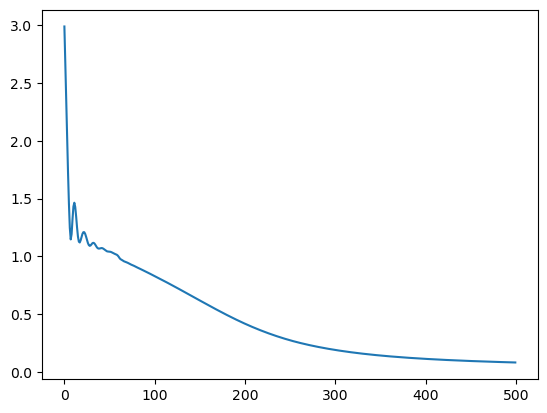

In [180]:
epochs = 500 
losses = []
for i in range(epochs): 
    
    y_pred = model(xtrain)
    loss = c(y_pred , ytrain)
    losses.append(loss.detach().numpy())
    
    if i % 50 == 0 : 
        print(f"Epochs : {i} , Loss : {loss}")
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    

plt.plot(losses)
plt.show()

In [ ]:
# testing on data , The model didnt see it before

with t.no_grad():
    y_pred = model(xtest)
    result  = F.softmax(y_pred)
    z = result.argmax(1)
    correct = (z == ytest).sum().item()
    acc = (correct / len(ytest) ) * 100
    
    print(acc)
    print(len(ytest))

97.01492537313433
67


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4200\3946259593.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  result  = F.softmax(y_pred)


In [ ]:
species_map = {
    0: "Adelie",
    1: "Gentoo",
    2: "Chinstrap"
}

new_penguin = t.tensor([39.1,	18.7	,181.0	]).unsqueeze(0)
print(new_penguin.shape) #torch.Size([1, 3]) 1 batch and 3 features

with t.no_grad():
    output = model(new_penguin)
    prob = F.softmax(output, dim=1)
    pred_class = prob.argmax(1).item()
    
    print(f"Probabilities: {prob}")
    print(f"Predicted Class Index: {pred_class}")
    print(f"Predicted Species: {species_map[pred_class]}")


torch.Size([1, 3])
Probabilities: tensor([[9.5870e-01, 8.4539e-04, 4.0455e-02]])
Predicted Class Index: 0
Predicted Species: Adelie


In [194]:
# save the model 


t.save(model.state_dict() , 'FILE.pt')


In [212]:
new_model = Model()
new_model.load_state_dict(t.load('FILE.pt'))

penguin = t.tensor([49.6	,18.2	,193.0	]).unsqueeze(0)

with t.no_grad():
    output = new_model(penguin)
    prob = F.softmax(output , dim=1)
    print(prob)
    pred = prob.argmax(1).item()
    print(pred)

tensor([[0.0079, 0.0064, 0.9857]])
2


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4200\2082293687.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(t.load('FILE.pt'))
